<a href="https://colab.research.google.com/github/shokirovjamshid/ob_havo/blob/main/ob_havo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:

import geopy.geocoders
import requests
import json

In [ ]:

from datetime import datetime,date

In [ ]:
import pandas as pd
df = pd.DataFrame({'name': ['Samarqand', 'Tokio', 'Toshkent']},dtype=str)
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='OB-HAVO')

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['name'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
koodinalar=df['point']
print(df['location'])

0    (Samarqand shahri, Samarqand Viloyati, 140000,...
1                 (東京都, 日本, (35.6840574, 139.7744912))
2    (Toshkent, 100000, Oʻzbekiston, (41.3123363, 6...
Name: location, dtype: object


Qaysi shaharni ob-hovasini bilmoqchisiz :Samarqand, Tokio, Toshkent :samarqand


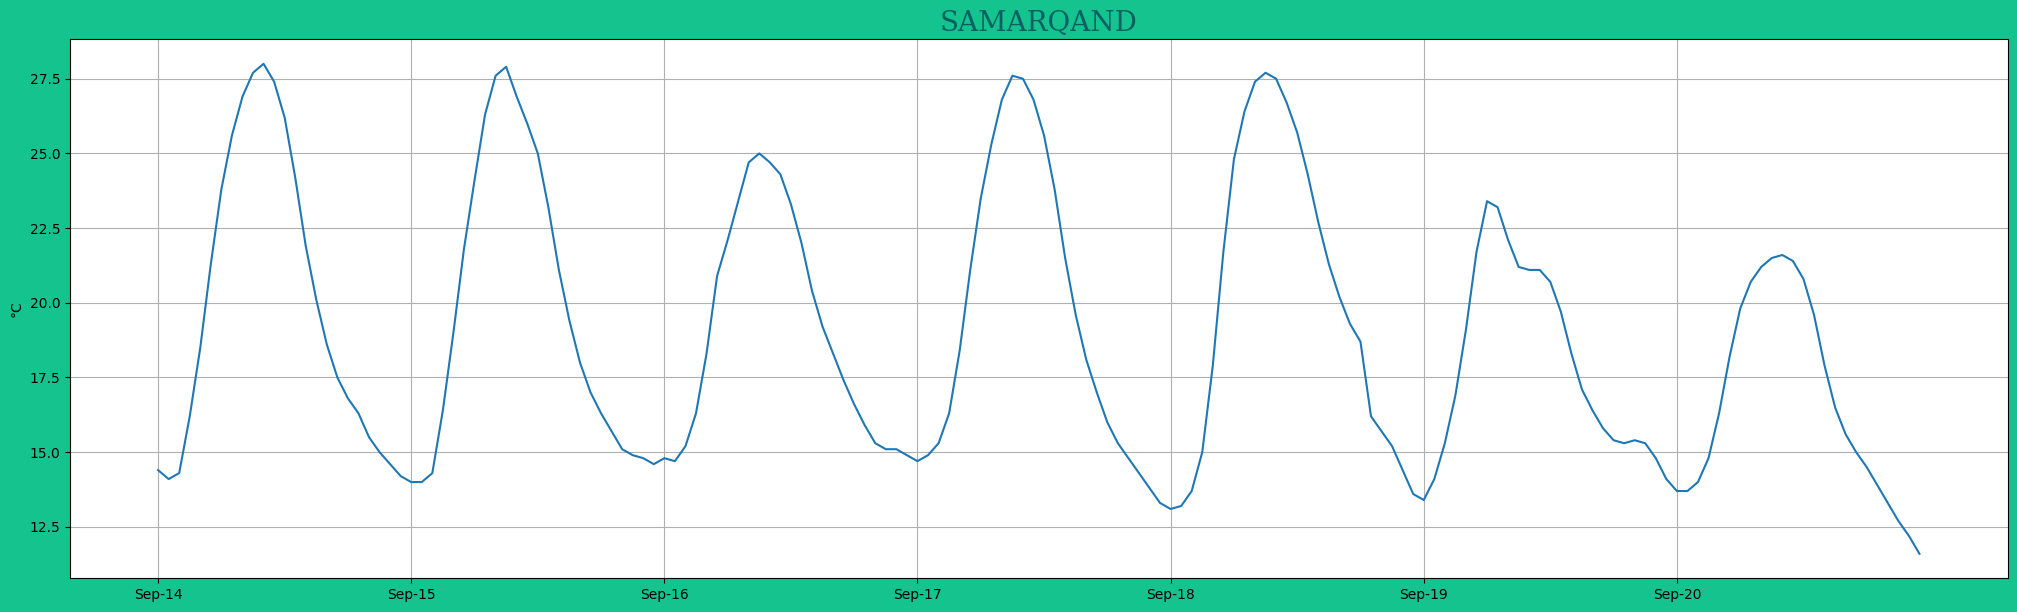

In [ ]:

s = input("Qaysi shaharni ob-hovasini bilmoqchisiz :Samarqand, Tokio, Toshkent :").lower()
l = {"samarqand":0,'tokio':1,'toshkent':2}
try:
  p = l[s]
  k = koodinalar[p]
  data = requests.get(f'https://api.open-meteo.com/v1/forecast?latitude={k[0]}&longitude={k[1]}&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m')
  textdata = data.text
  jsondata = json.loads(textdata)
  data_hourly = pd.DataFrame(jsondata['hourly'])
  plt.figure(figsize=(25,7),facecolor='#14C38E')
  plt.plot(data_hourly['time'],data_hourly['temperature_2m'])
  time = pd.DataFrame(data_hourly['time'])
  zip1 = zip(jsondata['hourly']['temperature_2m'],jsondata['hourly']['time'])
  u=[]
  for i,n in zip1:
    b = date.fromisoformat(n.split('T')[0])
    d4 = b.strftime("%b-%d")
    u.append(d4)
  plt.xticks(np.arange(168,step=24),labels=np.array(u)[::24])
  plt.ylabel('°C')
  font2 = {'family':'serif','color':'darkred','size':15}
  plt.title(f"{s.upper()}",fontsize=20,color='#066163',fontdict = font2)
  plt.grid('majnor')
  plt.show()
except KeyError:
  print('Bunday shahar kiritilmagan')